In [1]:
import pandas as pd
###CARGAR LOS DATOS###
ruta=("G:/Mi unidad/CURSOS-ESPECIALIZACION/ML_Python-DMC/avance/data/diabetes.csv")

In [2]:
data=pd.read_csv(ruta)

In [3]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
##entendiendo los datos ##
#ver las primeras filas
data.head(1)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1


In [5]:
###dimension de los datos ## 
data.shape

(768, 9)

In [6]:
##tipos de datos ##
data.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [7]:
##describicion de los datos##
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
##distribucion de las clases
conteo_data=data.groupby("Outcome").size()#la variable respuesta es "Outcome"
print(conteo_data)#personas no_diabeticas=0  , personas diabeticas=1


Outcome
0    500
1    268
dtype: int64


In [9]:
##correlacion entre caracteristicas## 
correlacion=data.corr(method="pearson")
print(correlacion)

                          Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.129459       0.141282      -0.081672   
Glucose                      0.129459  1.000000       0.152590       0.057328   
BloodPressure                0.141282  0.152590       1.000000       0.207371   
SkinThickness               -0.081672  0.057328       0.207371       1.000000   
Insulin                     -0.073535  0.331357       0.088933       0.436783   
BMI                          0.017683  0.221071       0.281805       0.392573   
DiabetesPedigreeFunction    -0.033523  0.137337       0.041265       0.183928   
Age                          0.544341  0.263514       0.239528      -0.113970   
Outcome                      0.221898  0.466581       0.065068       0.074752   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.073535  0.017683                 -0.033523   
Glucose                   0.331357  0.221

##### pearson asume que las variables se distirbyen normalmente 
##### pues podria traer problema en un modelo de regresion lineal y a un modelo de regresion logistica.

## CHAPTER-6 VISUALIZANDO   LOS DATOS

In [10]:
import matplotlib.pyplot as plt

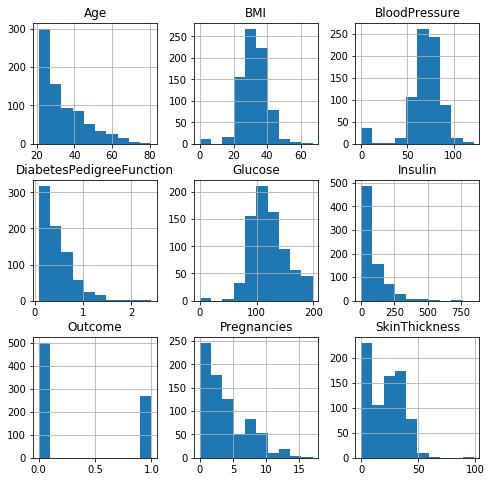

In [11]:
#histograma 
data.hist(figsize= (8,8))
plt.show()

#### se puede obserbar que las varaibles que se distribuyen normalmente son "BMI" , "BloodPressure", "Glucose"

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [13]:
data.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

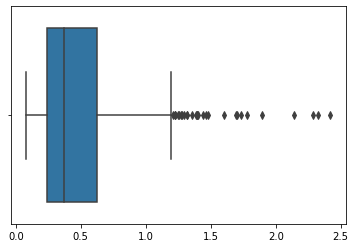

In [14]:
#Diagrama de cajas 
sns.boxplot(list(data["DiabetesPedigreeFunction"]))
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

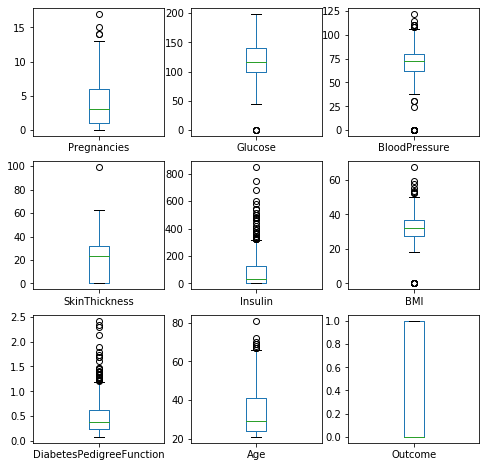

In [15]:
data.plot(kind="box", subplots=True, layout=(3,3), sharex=False, sharey=False,figsize= (8,8))
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

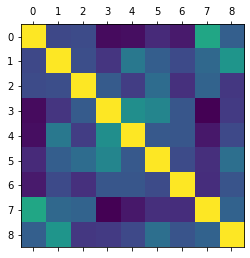

In [16]:
#matriz de correlacion 
plt.matshow(data.corr())
plt.show

# CHAPTER-7 PROCESAMIENTO DE LOS DATOS

#### PREPARAR LOS DATOS PARA MACHINE LEARNING------------------  sklearn.preprocessing
#### Debido que los algoritmos hacen suposiciones sobre los datos.
#### HAY 3 FORMAS
###### 1.Estandarizar los datos(no necesarimente se encuentra en un intervalo de 0-1)
###### 2.Normalizar los datos (se encuentra en un intervalo de 0-1)
###### 3.eliminacion de columnas

In [17]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [18]:
#Datos de entrada o independiente
x=data.drop(["Outcome"],axis=1)#axis =0  fila ,axis=1 columna
x.tail(1)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
767,1,93,70,31,0,30.4,0.315,23


In [19]:
x.columns.values.tolist()

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

In [20]:
y=data["Outcome"]
y.tail(2)

766    1
767    0
Name: Outcome, dtype: int64

### 1.Estandarizar los datos(no necesarimente se encuentra en un intervalo de 0-1)

##### Debe a que los algoritmos se pueden comportar mal si las
##### características individuales no se parecen más o menos a los datos estándar
##### normalmente distribuidos.


In [21]:
# Para cumplir con este procedimiento se utiliza la función StandardScaler de la librería scikit-learn 
#y se aplica, en este caso a todos los datos del conjunto de datos “X”.

###### -----------------------------StandardScaler de la librería scikit-learn ---------------------------------------------

In [22]:
from sklearn.preprocessing import StandardScaler

x_estandar= StandardScaler().fit_transform(x)
print(x_estandar[0:5,:])
#genera una matriz del tipo NumPy con los datos estandarizados

[[ 0.63994726  0.84832379  0.14964075  0.90726993 -0.69289057  0.20401277
   0.46849198  1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575  0.53090156 -0.69289057 -0.68442195
  -0.36506078 -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 -1.28821221 -0.69289057 -1.10325546
   0.60439732 -0.10558415]
 [-0.84488505 -0.99820778 -0.16054575  0.15453319  0.12330164 -0.49404308
  -0.92076261 -1.04154944]
 [-1.14185152  0.5040552  -1.50468724  0.90726993  0.76583594  1.4097456
   5.4849091  -0.0204964 ]]


In [23]:
#variables predictoras o variables independientes _EN FORMATO PANDAS
x_pandas=pd.DataFrame(data=x_estandar,columns=x.columns)
x_pandas.head(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672


### 2.Normalizacion de los Datos( se encuentra en un intervalo de 0-1)

##### Normalizar los datos se refiere a cambiar la escala de los datos de la característica para
##### que tengan una longitud de 1. Este método de procesamiento puede ser útil para
##### conjuntos de datos dispersos (muchos ceros) con atributos de diferentes escalas

###### --------------------------- Normalizer de la librería scikit-learn--------------------------

In [24]:
#Normalizacion de los datos
from sklearn.preprocessing import Normalizer

In [25]:
x_normalizer= Normalizer().fit_transform(x)
print(x_normalizer)
#genera una matriz del tipo NumPy con los datos Normalizados

[[0.03355237 0.82762513 0.40262844 ... 0.18789327 0.00350622 0.27960308]
 [0.008424   0.71604034 0.55598426 ... 0.22407851 0.00295683 0.26114412]
 [0.04039768 0.92409698 0.32318146 ... 0.11765825 0.00339341 0.16159073]
 ...
 [0.02691539 0.65135243 0.38758161 ... 0.14103664 0.00131885 0.16149234]
 [0.00665306 0.83828547 0.39918356 ... 0.20025708 0.00232192 0.31269379]
 [0.00791454 0.73605211 0.55401772 ... 0.24060198 0.00249308 0.18203439]]


In [26]:
#variables predictoras o variables independientes _EN FORMATO PANDAS
x_pandas=pd.DataFrame(data=x_normalizer , columns= x.columns)
x_pandas.tail(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
766,0.006653,0.838285,0.399184,0.000000,0.0,0.200257,0.002322,0.312694
767,0.007915,0.736052,0.554018,0.245351,0.0,0.240602,0.002493,0.182034


### 3.eliminacion de columnas

##### La función a utilizar para cumplir con esta forma es drop

In [27]:
# eliminacion de columnas
x=data.drop(["BloodPressure"],axis=1)
x.tail(1)

,Pregnancies,Glucose,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
767,1,93,31,0,30.4,0.315,23,0


# CHAPTER-8 SELECCIONANDO CARACTERISTICAS 

##### las tecnicas de seleccion automatica de caracteristicas que pueden 
##### ser utilizadas para preparar los datos
###### METODO DE FILTRO
###### METODO DE ENVOLTURA
###### METODO DE INTEGRADAS

In [28]:
#cuando los conjuntos de datos son de alta dimension:
#
#1.las caracteristicas adicionales actuan como un ruido para el cual el modelo de Machine Learning 
#puede tener un rendimiemto extremadamente bajo.
#
#2.El modelo tarda mas tiempo en entrenarse
#
#3.Asignacion de recursos innecesarios para estas caracteristicas

###### METODO DE FILTRO

###### Los métodos de filtro se utilizan generalmente como un paso de preprocesamiento de datos, la selección de características es independiente de cualquier algoritmo de Machine Learning.

In [29]:
#conjunto con todas las caracteristicas->seleccion del mejor subconjunto->algoritmo de ML->Evaluacion del rendimiento

In [30]:
#caracteristicas/prediccion -->        continuo                  categoricos
#       | 
#     continuo                    Correlacion de Pearson           LDA
#   categoricos                         Anova                     Chi-cuadrado


In [31]:
#Metodo de filtro
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import numpy as np
#Extraccion de caracteristicas: chi-cuadrado
prueba=SelectKBest(score_func=chi2, k=5)
entrenamiento=prueba.fit(x,y)
#Puntaje de caracteristicas: chi_cuadrado
np.set_printoptions(precision=3)
print(entrenamiento.scores_)

[ 111.52  1411.887   53.108 2175.565  127.669    5.393  181.304  500.   ]


In [32]:
#caracteristicas selecionadas: chi-cuadrada
caracteristicas=entrenamiento.transform(x)
print(caracteristicas[0:5,:])

[[148.    0.   33.6  50.    1. ]
 [ 85.    0.   26.6  31.    0. ]
 [183.    0.   23.3  32.    1. ]
 [ 89.   94.   28.1  21.    0. ]
 [137.  168.   43.1  33.    1. ]]


In [33]:
caracteristicas.shape#me quedo con 5 variables, las mas influyentes,descartar 2 variables predictoras y la target

(768, 5)

In [34]:
x.columns.values.tolist()#Pregnancies,Glucose,Insulin,BMI,Age

['Pregnancies',
 'Glucose',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome']

###### METODO ENVOLTURA

###### un método de envoltura necesita un algoritmo de Machine Learning

In [35]:
#1.Selección hacia delante (Forward Selection)
#2.Eliminación hacia atrás (Backward Selection)
#3.Eliminación de características recursivas (Recursive Feature Elimination)

In [36]:
#Metodo de Envoltura
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [37]:
#Extraccion de caracteristicas
modelo = LogisticRegression()
rfe = RFE(modelo, 5)
entrenamiento= rfe.fit(x,y)
print("numero de caracteristicas: %s" % (entrenamiento.n_features_))
print("caracteristicas seleccionadas: %s" % (entrenamiento.support_))
print("clasificacion  de caracteristicas: %s" % (entrenamiento.ranking_))

C:\Users\Luis\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass n_features_to_select=5 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\Luis\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


numero de caracteristicas: 5
caracteristicas seleccionadas: [ True  True False False  True  True False  True]
clasificacion  de caracteristicas: [1 1 3 4 1 1 2 1]


C:\Users\Luis\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


###### METODO INTEGRADOS

##### Combina las cualidades de los métodos de filtro y envoltura.
##### regresión LASSO y RIDGE

# CHAPTER-9 ALGORITMOS DE CLASIFICACION

1. Regresión logística
2. K Vecinos más cercanos
3. Máquinas de vectores de soporte
4. Naive bayes
5. Árboles de decisión clasificación
6. Bosques aleatorios clasificación

### REGRESION LOGISTICA

La Regresión Logística es uno de los algoritmos de Machine Learning más simples y
más utilizados para la clasificación de dos clases. Es fácil de implementar y se puede
usar como línea de base para cualquier problema de clasificación binaria. La Regresión
Logística describe y estima la relación entre una variable binaria dependiente y las
variables independientes

In [38]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [39]:
ruta=("G:/Mi unidad/CURSOS-ESPECIALIZACION/ML_Python-DMC/avance/data/diabetes.csv")
data=pd.read_csv(ruta)
data.head(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0


In [40]:
x=data.iloc[:,:-1].values
y=data.iloc[:,-1].values
sc=StandardScaler()
x=sc.fit_transform(x)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)#20% prueba
modelo=LogisticRegression()
modelo.fit(x_train,y_train)
y_pred=modelo.predict(x_test)
print("datos de entrenamiento :")#real
print(y_test)
print("datos de obtencion en la prediccion :")#predicho
print(y_pred)

datos de entrenamiento :
[1 0 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1
 0 0 0 0 0 0 1 1 0 0 1 1 1 0 0 1 0 0 0 0 1 1 1 1 0 0 1 1 1 1 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 1 0 0 0 1 0
 1 1 1 1 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 1 1 0 0 0 0 0 1 0 0 0
 0 1 0 1 0 0]
datos de obtencion en la prediccion :
[1 0 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0
 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 1 1 1 1 0 0 0 0 0 0 1
 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 1 0 0 0 0 1 0
 0 1 0 1 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0
 0 0 0 1 0 0]


### K-VECINOS MAS CERCANOS
##### K vecinos más cercanos es un algoritmo de aprendizaje no paramétrico, esto significa
que no hace suposiciones para la distribución de datos subyacentes.

##### El algoritmo necesita todos los datos de entrenamiento y son utilizados en la fase de
prueba. Esto hace que la capacitación sea más rápida y la fase de prueba más lenta y
costosa. Lo costoso se refiere a que se requiere tiempo y memoria.

In [41]:
import pandas as pd 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [42]:
ruta=("G:/Mi unidad/CURSOS-ESPECIALIZACION/ML_Python-DMC/avance/data/diabetes.csv")
data=pd.read_csv(ruta)

In [43]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [44]:
#forma_1

In [45]:
x1=data.iloc[:,[1,2] ]
x1.head(1)

,Glucose,BloodPressure
0,148,72


In [46]:
#forma2

In [47]:
columnas=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']
x=data[columnas]
x.head(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31


### forma_3

In [48]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [49]:
x=data.iloc[:,0:8]
x.head(1)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50


In [50]:
y=data[['Outcome']]
y.head(1)

,Outcome
0,1


In [51]:
x=data.iloc[:,:1].values#valores
y=data.iloc[:,-1].values#valores
sc=StandardScaler()
x=sc.fit_transform(x)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
modelo=KNeighborsClassifier()
modelo.fit(x_train,y_train)
y_pred=modelo.predict(x_test)
print("datos de entrenamiento")
print(y_test)#real
print("datos obtenidos en la prediccion")
print(y_pred)


datos de entrenamiento
[1 0 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1
 0 0 0 0 0 0 1 1 0 0 1 1 1 0 0 1 0 0 0 0 1 1 1 1 0 0 1 1 1 1 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 1 0 0 0 1 0
 1 1 1 1 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 1 1 0 0 0 0 0 1 0 0 0
 0 1 0 1 0 0]
datos obtenidos en la prediccion
[0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 1 1 0 0 0 0 1 1 0 1 1 0 1 0 0
 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0
 1 1 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 1 0 1 0 0 0 0 0 1 1 0 0 0
 0 0 0 0 0 0]


In [52]:
x

array([[ 0.64 ],
       [-0.845],
       [ 1.234],
       [-0.845],
       [-1.142],
       [ 0.343],
       [-0.251],
       [ 1.828],
       [-0.548],
       [ 1.234],
       [ 0.046],
       [ 1.828],
       [ 1.828],
       [-0.845],
       [ 0.343],
       [ 0.937],
       [-1.142],
       [ 0.937],
       [-0.845],
       [-0.845],
       [-0.251],
       [ 1.234],
       [ 0.937],
       [ 1.531],
       [ 2.125],
       [ 1.828],
       [ 0.937],
       [-0.845],
       [ 2.719],
       [ 0.343],
       [ 0.343],
       [-0.251],
       [-0.251],
       [ 0.64 ],
       [ 1.828],
       [ 0.046],
       [ 2.125],
       [ 1.531],
       [-0.548],
       [ 0.046],
       [-0.251],
       [ 0.937],
       [ 0.937],
       [ 1.531],
       [ 0.937],
       [-1.142],
       [-0.845],
       [-0.548],
       [ 0.937],
       [ 0.937],
       [-0.845],
       [-0.845],
       [ 0.343],
       [ 1.234],
       [ 0.937],
       [-0.845],
       [ 0.937],
       [-1.142],
       [-1.142

In [53]:
y

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,

In [54]:
data.head(1)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1


In [55]:
pip install xlrd

Note: you may need to restart the kernel to use updated packages.


In [56]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [57]:
ruta=("G:/Mi unidad/CURSOS-ESPECIALIZACION/ML_Python-DMC/avance/ML.AprendisajeSupervisado/data.xlsx")
data_excel=pd.read_excel(ruta)

In [58]:
data_excel1=data_excel.values
data_excel1

array([[  6.   , 148.   ,  72.   ,  35.   ,   0.   ,  33.6  ,   0.627,
         50.   ]])

### MAQUINAS DE VECTORES DE SOPORTE 

##### Las máquinas de vectores de soporte buscan la línea que mejor separa dos clases.

In [59]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

In [60]:
ruta=("G:/Mi unidad/CURSOS-ESPECIALIZACION/ML_Python-DMC/avance/data/diabetes.csv")
data=pd.read_csv(ruta)

In [61]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [62]:
x=data.iloc[:,:-1].values
y=data.iloc[:,-1].values
sc=StandardScaler()
x=sc.fit_transform(x)
x_train,x_test,y_test,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
modelo=SVC()
modelo.fit(x_train,y_train)
y_pred=modelo.predict(x_test)
print("datos de entrenamiento")
print(y_test)
print("datos obtenidos en la prediccion")
print(y_pred)

datos de entrenamiento
[1 0 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1
 0 0 0 0 0 0 1 1 0 0 1 1 1 0 0 1 0 0 0 0 1 1 1 1 0 0 1 1 1 1 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 1 0 0 0 1 0
 1 1 1 1 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 1 1 0 0 0 0 0 1 0 0 0
 0 1 0 1 0 0]
datos obtenidos en la prediccion
[1 0 0 1 0 0 1 1 1 0 1 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0
 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 1 1 1 0 0 0 0 0 0 1
 1 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 1 0 0 0 0 1 0
 0 1 1 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0]


### BAYESIANO INGENUO(NAIVE BAYES)

##### Naive Bayes es una técnica de clasificación estadística basada en el teorema de Bayes.Es uno de los algoritmos de machine learning mas simple.Es un algoritmo rapido,preciso y fiable,inclusive tiene una alta precision y velocidad en grandes conjuntos de datos.

In [63]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB 

In [64]:
ruta=("G:/Mi unidad/CURSOS-ESPECIALIZACION/ML_Python-DMC/avance/data/diabetes.csv")
data=pd.read_csv(ruta)
data.head(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0


In [65]:
x=data.iloc[:,:-1].values
y=data.iloc[:,-1].values
sc=StandardScaler()
x=sc.fit_transform(x)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)#en ese orden 
modelo=GaussianNB() 
modelo.fit(x_train, y_train)
y_pred=modelo.predict(x_test)
print("datos en entrenamiento:")
print(y_test)
print("datos obtenidos en la prediccion:")
print(y_pred)

datos en entrenamiento:
[1 0 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1
 0 0 0 0 0 0 1 1 0 0 1 1 1 0 0 1 0 0 0 0 1 1 1 1 0 0 1 1 1 1 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 1 0 0 0 1 0
 1 1 1 1 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 1 1 0 0 0 0 0 1 0 0 0
 0 1 0 1 0 0]
datos obtenidos en la prediccion:
[1 0 0 1 0 0 1 1 1 0 1 1 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1
 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 0 1 1 1 1 0 0 0 0 0 0 1
 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 1 0 0 0 0 1 0
 0 1 1 1 1 0 1 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0]


### ARBOLES DE DECISION CLASIFICACION
##### Árbol de decisión es un tipo de algoritmo de aprendizaje supervisado que se utiliza
principalmente en problemas de clasificación, aunque funciona para *** variables de
entrada y salida categóricas como continuas ***. 

##### Los métodos basados en árboles
potencian modelos predictivos con alta precisión, estabilidad y facilidad de
interpretación. A diferencia de los modelos lineales, mapean bastante bien las
relaciones no lineales.




In [66]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [67]:
ruta=("G:/Mi unidad/CURSOS-ESPECIALIZACION/ML_Python-DMC/avance/data/diabetes.csv")
data=pd.read_csv(ruta)

In [68]:
x=data.iloc[:,:-1].values
y=data.iloc[:,-1].values
sc=StandardScaler()
x=sc.fit_transform(x)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
modelo=DecisionTreeClassifier()
modelo.fit(x_train,y_train)
y_pred=modelo.predict(x_test)
print("datos de entrenamiento")
print(y_test)
print("datos obtenidos en la prediccion")
print(y_pred)

datos de entrenamiento
[1 0 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1
 0 0 0 0 0 0 1 1 0 0 1 1 1 0 0 1 0 0 0 0 1 1 1 1 0 0 1 1 1 1 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 1 0 0 0 1 0
 1 1 1 1 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 1 1 0 0 0 0 0 1 0 0 0
 0 1 0 1 0 0]
datos obtenidos en la prediccion
[1 0 0 1 0 0 1 1 0 1 1 1 0 0 0 1 1 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 1 0 0 1 0
 0 1 1 1 0 0 1 1 0 0 1 1 0 1 1 1 1 0 0 0 1 0 0 1 1 0 1 1 1 0 0 1 0 0 0 0 1
 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 1 0 1 1 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0]


### BOSQUES ALEATORIOS CLASIFICACION
##### Lleva a cabo métodos de reducción dimensional, trata valores perdidos, valores atípicos y otros
pasos esenciales de exploración de datos, y hace un trabajo bastante bueno.

Es un tipo
de método de aprendizaje por conjuntos, donde un grupo de modelos débiles se
combinan para formar un modelo poderoso.
En los boques aleatorios se cultivan varios árboles en lugar de un solo árbol. Para
clasificar un nuevo objeto basado en atributos, cada árbol da una clasificación y se dice
que el árbol “vota” por esa clase. El bosque elige la clasificación con más votos, sobre
todos los árboles en el bosque.

In [69]:
import pandas as pd 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier


In [70]:
ruta=("G:/Mi unidad/CURSOS-ESPECIALIZACION/ML_Python-DMC/avance/data/diabetes.csv")
data=pd.read_csv(ruta)
data.tail(1)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
767,1,93,70,31,0,30.4,0.315,23,0


In [71]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [72]:
# la variable que tenga que su media este muy cercana a su desviacion esta varaible no sera significativa

In [73]:
x=data.iloc[:,:-1].values
y=data.iloc[:,-1].values
sc=StandardScaler()
x=sc.fit_transform(x)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=0)
modelo=RandomForestClassifier()
modelo.fit(x_train,y_train)
y_pred=modelo.predict(x_test)
print("datos de entrenamiento")
print(y_test)
print("datos obtenidos en la prediccion")
print(y_pred)


datos de entrenamiento
[1 0 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1
 0 0 0 0 0 0 1 1 0 0 1 1 1 0 0 1 0 0 0 0 1 1 1 1 0 0 1 1 1 1 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 1 0 0 0 1 0
 1 1 1 1 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 1 1 0 0 0 0 0 1 0 0 0
 0 1 0 1 0 0]
datos obtenidos en la prediccion
[1 0 0 1 0 0 1 1 0 0 1 1 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0
 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 0 1 1 1 1 0 1 0 0 0 0 1
 1 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 1 0 0 0 1 0
 0 1 1 1 1 0 1 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 0
 0 0 0 0 0 0]


##### Todos los algoritmos se pueden configurar definiendo ciertos parámetros para
mejorar el rendimiento del modelo. Todos estos parámetros se encuentran definidos
en la librería scikit-learn.


# CHAPTER 10 METRICAS 

### METRICAS DE RENDIMIENTO ALGORITMOS DE CLASIFICACION

Para los problemas de clasificación de Machine Learning se cuentan con una gran
cantidad de métricas que se pueden usar para evaluar las predicciones de estos
problemas. En esta sección se explicará cómo implementar varias de estas métricas.

##### matriz de confusion
##### reporte de clasificacion
##### area bajo la curva


####  1.MATRIZ DE CONFUSION 


In [74]:
import pandas as pd 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

In [75]:
ruta=('G:/Mi unidad/CURSOS-ESPECIALIZACION/ML_Python-DMC/avance/data/diabetes.csv')
data=pd.read_csv(ruta)
data.head(1)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1


In [76]:
x=data.iloc[:,:-1].values
y=data.iloc[:,-1].values
sc=StandardScaler()
x=sc.fit_transform(x)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
modelo=LogisticRegression()
modelo.fit(x_train,y_train)
y_pred=modelo.predict(x_test)#predecido
matriz=confusion_matrix(y_test,y_pred)
print(matriz)#solo se que en la diagonal son los valores correctos 


[[98  9]
 [18 29]]


####  2.REPORTE DE CLASIFICACION 


In [77]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [78]:
ruta=('G:/Mi unidad/CURSOS-ESPECIALIZACION/ML_Python-DMC/avance/data/diabetes.csv')
data=pd.read_csv(ruta)

#----------------------------------------------------------------------------

In [79]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [80]:
columnas=['SkinThickness', 'Insulin','BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
data1=data[columnas]
data1.head(2)

,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,35,0,33.6,0.627,50,1
1,29,0,26.6,0.351,31,0


In [81]:
data1.to_excel("C:/Users/Luis/Desktop/data_excel.xlsx")


#----------------------------------------------------------------------------------

In [82]:
x=data.iloc[:,:-1].values
y=data.iloc[:,-1].values
sc=StandardScaler()
x=sc.fit_transform(x)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
modelo=LogisticRegression()
modelo.fit(x_train,y_train)
y_pred=modelo.predict(x_test)
reporte=classification_report(y_test,y_pred)
print(reporte)

              precision    recall  f1-score   support

           0       0.84      0.92      0.88       107
           1       0.76      0.62      0.68        47

    accuracy                           0.82       154
   macro avg       0.80      0.77      0.78       154
weighted avg       0.82      0.82      0.82       154



In [83]:
modelo.coef_

array([[ 0.303,  1.066, -0.258,  0.068, -0.155,  0.682,  0.292,  0.235]])

### 3.AREA BAJO LA CURVA

Cuando se trata de un problema de clasificación, se puede contar con una curva AUC-ROC, para medir el rendimiento. Esta es una de las métricas de evaluación más
importante para verificar el rendimiento de cualquier modelo de clasificación. ROC
viene de las características de funcionamiento del receptor y AUC del área bajo la curva.


In [84]:
import pandas as pd 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

In [85]:
ruta=('G:/Mi unidad/CURSOS-ESPECIALIZACION/ML_Python-DMC/avance/data/diabetes.csv')
data=pd.read_csv(ruta)

In [86]:
x=data.iloc[:,:-1].values
y=data.iloc[:,-1].values
sc=StandardScaler()
x=sc.fit_transform(x)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
modelo=LogisticRegression()
modelo.fit(x_train,y_train)
y_pred=modelo.predict(x_test)
resultado=roc_auc_score(y_test,y_pred)
print(resultado)

0.7664545635315172


El valor obtenido es relativamente cercano a 1 y mayor a 0.5, lo que sugiere que gran
parte de las predicciones realizadas han sido correctas.

# CHAPTER 11 ALGORITMOS DE REGRESION

### 1.Regresion lineal
### 2.Regresion Polinomial
### 3.Vectores de Soporte Regresion
### 4.Arboles de decision Regresion

### 1.Regresion Lineal

La regresión lineal es una técnica paramétrica utilizada para predecir variables
continuas, dependientes, dado un conjunto de variables independientes.
Es de naturaleza paramétrica porque hace ciertas suposiciones basadas en el conjunto de
datos. Si el conjunto de datos sigue esas suposiciones, la regresión arroja resultados
increíbles.

In [112]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


In [113]:
ruta=("G:/Mi unidad/CURSOS-ESPECIALIZACION/ML_Python-DMC/avance/data/advertising.csv")

In [114]:
data=pd.read_csv(ruta)

In [128]:
data.iloc[:,[0]].values

array([[  1],
       [  2],
       [  3],
       [  4],
       [  5],
       [  6],
       [  7],
       [  8],
       [  9],
       [ 10],
       [ 11],
       [ 12],
       [ 13],
       [ 14],
       [ 15],
       [ 16],
       [ 17],
       [ 18],
       [ 19],
       [ 20],
       [ 21],
       [ 22],
       [ 23],
       [ 24],
       [ 25],
       [ 26],
       [ 27],
       [ 28],
       [ 29],
       [ 30],
       [ 31],
       [ 32],
       [ 33],
       [ 34],
       [ 35],
       [ 36],
       [ 37],
       [ 38],
       [ 39],
       [ 40],
       [ 41],
       [ 42],
       [ 43],
       [ 44],
       [ 45],
       [ 46],
       [ 47],
       [ 48],
       [ 49],
       [ 50],
       [ 51],
       [ 52],
       [ 53],
       [ 54],
       [ 55],
       [ 56],
       [ 57],
       [ 58],
       [ 59],
       [ 60],
       [ 61],
       [ 62],
       [ 63],
       [ 64],
       [ 65],
       [ 66],
       [ 67],
       [ 68],
       [ 69],
       [ 70],
       [ 71],
      

In [129]:
data.iloc[:,[0]]

,Unnamed: 0
0,1
1,2
2,3
3,4
4,5
...,...
195,196
196,197
197,198
198,199


In [116]:
x=data.iloc[:,1:-1].values
y=data.iloc[:,-1].values
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
modelo=LinearRegression()
modelo.fit(x_train,y_train)
y_pred=modelo.predict(x_test)
print("datos de entrenamiento")
print(y_test)
print("datos obtenidos en la prediccion")
print(y_pred)

datos de entrenamiento
[11.3  8.4  8.7 25.4 11.7  8.7  7.2 13.2  9.2 16.6 24.2 10.6 10.5 15.6
 11.8 13.2 17.4  1.6 14.7 17.  26.2 10.3 14.9 12.9  8.1 15.2 12.6 22.6
 11.6  8.5 12.5 23.7 16.1 21.8  5.6  6.7  9.7 12.9 13.6  7.2]
datos obtenidos en la prediccion
[10.057  7.452  7.02  24.08  12.018  6.538 12.783 15.11  10.77  16.344
 22.883  9.129 10.465 15.487 11.586 12.173 18.766 10.783 15.905 17.307
 24.067  9.598 15.135 12.386  5.714 15.247 12.294 20.942 13.41   9.043
 12.892 21.403 18.138 21.173  6.57   6.141  7.89  13.015 14.69   6.188]


### 2.REGRESION POLINOMIAL

La regresión polinomial es un caso especial de la regresión lineal, extiende el modelo
lineal al agregar predictores adicionales, obtenidos al elevar cada uno de los predictores
originales a una potencia. El método estándar para extender la regresión lineal a una
relación no lineal entre las variables dependientes e independientes, ha sido
reemplazar el modelo lineal con una función polinomial.

In [133]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [134]:
ruta=("G:/Mi unidad/CURSOS-ESPECIALIZACION/ML_Python-DMC/avance/data/advertising.csv")
data=pd.read_csv(ruta)

In [135]:
x=data.iloc[:,1:-1].values
y=data.iloc[:,-1].values
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=0)
poli_reg=PolynomialFeatures(degree=2)#definir el polinomio de grado 2
x_train_poli=poli_reg.fit_transform(x_train)#transformando las variables predictoras
x_test_poli=poli_reg.fit_transform(x_test)#transformando las variables predictoras
modelo=LinearRegression()
modelo.fit(x_train_poli,y_train)
y_pred=modelo.predict(x_test_poli)
print("datos de entrenamiento")
print(y_test)
print("datos obtenidos en la prediccion")
print(y_pred)

datos de entrenamiento
[11.3  8.4  8.7 25.4 11.7  8.7  7.2 13.2  9.2 16.6 24.2 10.6 10.5 15.6
 11.8 13.2 17.4  1.6 14.7 17.  26.2 10.3 14.9 12.9  8.1 15.2 12.6 22.6
 11.6  8.5 12.5 23.7 16.1 21.8  5.6  6.7  9.7 12.9 13.6  7.2]
datos obtenidos en la prediccion
[10.324  8.398  8.896 25.241 12.304  8.209  8.395 13.283  8.772 16.628
 24.35  10.214 10.974 15.789 11.478 12.818 17.464  6.767 14.254 17.477
 25.412 10.488 15.619 13.118  7.738 15.514 12.651 22.507 11.798  8.061
 12.842 23.236 15.473 22.205  6.749  6.725  9.022 13.256 13.085  7.051]


Para este algoritmo se debe realizar un paso adicional, antes de definir el modelo,
primeramente, se debe definir el grado del polinomio y transformar los datos
correspondientes a X. Realizado todo esto ahora si se puede definir el modelo,
entrenarlos y finalmente realizar una predicción

### 3. VECTORES DE SOPORTE REGRESION

Los vectores de soporte regresión utiliza los mismos principios que los de clasificación,
con solo algunas diferencias menores. En primer lugar, dado que la salida es un número
real, se vuelve muy difícil predecir la información disponible, que tiene infinitas
posibilidades, sin embargo, la idea principal es siempre la misma: minimizar el error,
individualizar el hiperplano que maximiza el margen, teniendo en cuenta que se tolera
parte del error.

In [136]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler

In [137]:
ruta=("G:/Mi unidad/CURSOS-ESPECIALIZACION/ML_Python-DMC/avance/data/advertising.csv")
data=pd.read_csv(ruta)

In [140]:
x=data.iloc[:,1:-1].values
sc=StandardScaler()
x=sc.fit_transform(x)
y=data.iloc[:,-1].values
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
modelo=SVR()
modelo.fit(x_train,y_train)
y_pred=modelo.predict(x_test)
print("datos de entrenamiento")
print(y_test)
print("datos obtenidos en la prediccion")
print(y_pred)

datos de entrenamiento
[11.3  8.4  8.7 25.4 11.7  8.7  7.2 13.2  9.2 16.6 24.2 10.6 10.5 15.6
 11.8 13.2 17.4  1.6 14.7 17.  26.2 10.3 14.9 12.9  8.1 15.2 12.6 22.6
 11.6  8.5 12.5 23.7 16.1 21.8  5.6  6.7  9.7 12.9 13.6  7.2]
datos obtenidos en la prediccion
[10.313  8.588  9.137 22.131 11.993  8.722 11.679 13.318 10.64  16.787
 22.43  10.106 10.963 15.867 11.372 12.776 17.164  9.6   14.437 17.671
 21.107 10.532 15.468 12.915  8.24  15.405 12.279 21.331 11.829  9.298
 13.618 21.296 15.397 21.673  9.465  7.812  9.986 13.212 13.237  8.154]


In [141]:
dato=data.iloc[:,1:-1]

In [142]:
dato.head#como estan en diferente escala, es por eso que se estandarizo

<bound method NDFrame.head of         TV  Radio  Newspaper
0    230.1   37.8       69.2
1     44.5   39.3       45.1
2     17.2   45.9       69.3
3    151.5   41.3       58.5
4    180.8   10.8       58.4
..     ...    ...        ...
195   38.2    3.7       13.8
196   94.2    4.9        8.1
197  177.0    9.3        6.4
198  283.6   42.0       66.2
199  232.1    8.6        8.7

[200 rows x 3 columns]>

Para este algoritmo, de igual forma, se debe definir el modelo, entrenarlo y realizar una
predicción. Para este conjunto de datos se realiza, previamente, un escalamiento en los
datos ya que el modelo no era del todo efectivo con los datos originales.

### 4.ARBOLES DE DECISION REGRESION